In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/umashankarlath/Downloads/data.csv') 
df.head(30)

,Lead_ID,LeadSubmitTs,InitialRightPartyContactTs,OpportunityCreatedTs,CreditPullDt,App_Initiate_Dt,Fund_Dt,Loan_Amount,Property_State,LeadExitTs,LeadExitDesc,MarketingPersona
0,77452771,8/30/22,8/31/22,NaN,NaN,NaN,NaN,$0.00,CA,NaN,Closed Lost,Wally
1,71005918,10/21/22,10/21/22,NaN,NaN,NaN,NaN,"$145,500.00",ME,10/21/22,Closed Lost,Carl
2,78923076,7/11/22,7/11/22,7/11/22,NaN,NaN,NaN,$0.00,LA,7/13/22,Closed Lost,Carl
3,77540822,8/24/22,8/24/22,NaN,NaN,NaN,NaN,"$242,500.00",NY,NaN,Closed Lost,Betty
4,74370689,5/11/22,5/11/22,5/11/22,5/11/22,NaN,NaN,"$420,000.00",VA,9/8/22,Closed Lost,Wally
5,77237190,9/11/22,9/12/22,NaN,9/12/22,9/12/22,NaN,"$281,300.00",MI,9/13/22,Closed Lost,Carl
6,76321714,5/28/22,5/28/22,5/28/22,5/28/22,NaN,NaN,"$485,000.00",MD,9/26/22,Inactive 120 Days,Carl
7,74667781,8/19/22,8/19/22,8/19/22,8/19/22,NaN,NaN,"$290,000.00",CO,8/19/22,Closed Lost,Betty
8,75127923,7/4/22,7/6/22,7/6/22,7/6/22,7/7/22,NaN,"$60,000.00",PA,7/6/22,Closed Lost,Carl
9,79844050,6/30/22,6/30/22,6/30/22,6/30/22,NaN,NaN,"$628,000.00",MA,9/29/22,Closed Lost,Betty


LeadExitDesc
Application Achieved       7.341468
Banker Transfer in MPX     0.700140
Cancelled in MAX           0.100020
Closed Lost               65.373075
Inactive 120 Days         10.282056
No Value                  16.183237
Withdrawn                  0.020004
Name: Lead_ID, dtype: float64


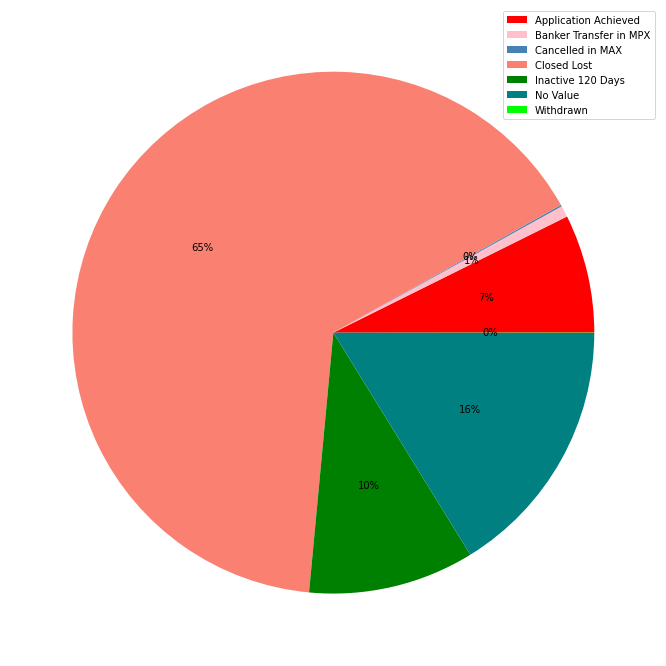

In [3]:
df=df.replace('Aged >120', 'Inactive 120 Days')
df=df.replace(['Cancelled by banker in MAX (Credit Pulled)','Killed from MAX','AUS Denied in MAX'], 'Cancelled in MAX')
df.Loan_Amount = [(x.replace('(','')) for x in df.Loan_Amount]
df.Loan_Amount = [(x.replace(')','')) for x in df.Loan_Amount]
df.Loan_Amount = [x.strip('$') for x in df.Loan_Amount]
df.Loan_Amount = [float(x.replace(',','')) for x in df.Loan_Amount]

n=df.groupby(['LeadExitDesc'],dropna=False)['Lead_ID'].count().values.sum()
df_group=df.groupby(['LeadExitDesc'],dropna=False)['Lead_ID'].count()*100/n
print(df_group)
y=df_group.values
plt.figure(figsize=(12, 12))
plt.pie(y, labels = df_group.index,autopct='%1.0f%%',labeldistance=None,colors = ['red', 'pink', 'steelblue','salmon','green','teal','lime'])

plt.legend(loc='upper right')
plt.show() 



MarketingPersona  LeadExitDesc          
Betty             Application Achieved       8.116883
                  Banker Transfer in MPX     0.649351
                  Cancelled in MAX           0.243506
                  Closed Lost               63.879870
                  Inactive 120 Days          9.821429
                  No Value                  17.288961
Carl              Application Achieved       7.227959
                  Banker Transfer in MPX     0.953137
                  Closed Lost               66.243050
                  Inactive 120 Days         11.040508
                  No Value                  14.535346
Cindy             Application Achieved       6.904955
                  Banker Transfer in MPX     0.649878
                  Cancelled in MAX           0.081235
                  Closed Lost               66.206336
                  Inactive 120 Days          9.991877
                  No Value                  16.084484
                  Withdrawn              

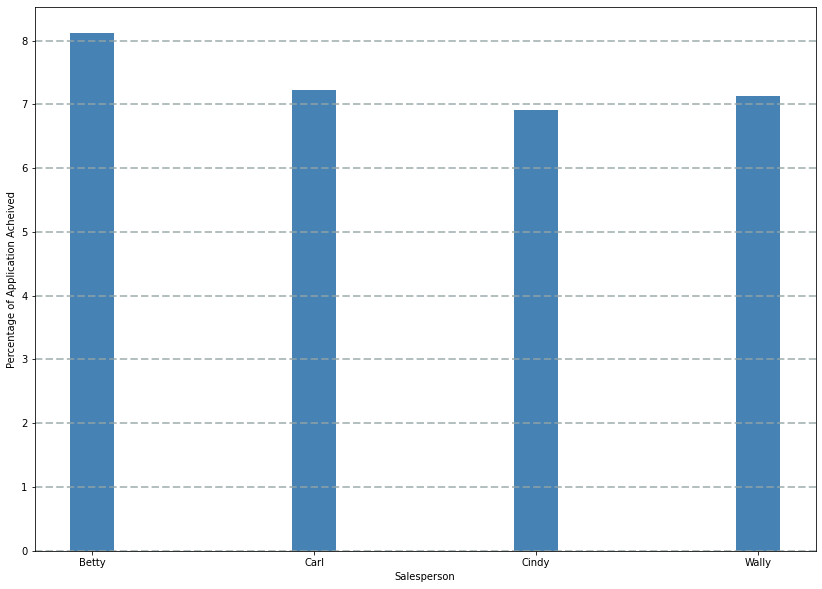

In [43]:
pct = lambda x: 100 * x / x.sum()
df_group=df.groupby(['MarketingPersona','LeadExitDesc'],dropna=False)['Lead_ID'].count().groupby('MarketingPersona').apply(pct)
print(df_group)
X = ['Betty','Carl','Cindy','Wally']
y1=[df_group['Betty']['Application Achieved'],df_group['Carl']['Application Achieved'],
df_group['Cindy']['Application Achieved'],df_group['Wally']['Application Achieved']]

fig = plt.figure(figsize = (14, 10))
plt.bar(X, y1, color ='steelblue',width = 0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("Salesperson")
plt.ylabel("Percentage of Application Acheived")
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


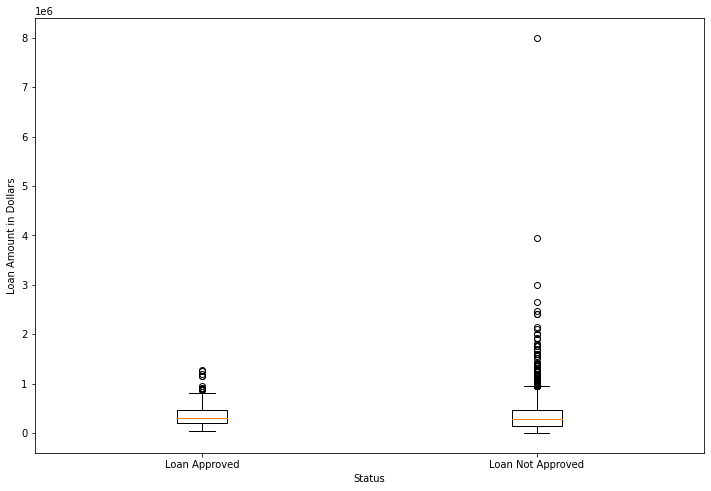

In [71]:
import matplotlib.pyplot as plt 
df_filter_Achieved=df[df['LeadExitDesc']=='wx']
df_filter_not_Achieved=df[df['LeadExitDesc']!='Application Achieved']
x1=df_filter_Achieved['Loan_Amount'].values
x2=df_filter_not_Achieved['Loan_Amount'].values
fig = plt.figure(figsize = (12, 8))

box_plot_data=[x1,x2]
plt.boxplot(box_plot_data,labels=['Loan Approved','Loan Not Approved'])
plt.xlabel("Status")
plt.ylabel("Loan Amount in Dollars")
plt.show()



In [72]:
print("Loan Approved \n",df_filter_Achieved['Loan_Amount'].describe())
print("Loan Not Approved \n",df_filter_not_Achieved['Loan_Amount'].describe())


Loan Approved 
 count    3.670000e+02
mean     3.528771e+05
std      2.161348e+05
min      4.275000e+04
25%      2.000000e+05
50%      2.950000e+05
75%      4.643000e+05
max      1.280000e+06
Name: Loan_Amount, dtype: float64
Loan Not Approved 
 count    4.632000e+03
mean     3.462709e+05
std      3.020549e+05
min      0.000000e+00
25%      1.520000e+05
50%      2.910000e+05
75%      4.750000e+05
max      8.000000e+06
Name: Loan_Amount, dtype: float64


In [7]:
df['LeadSubmitTs']= pd.to_datetime(df['LeadSubmitTs'])
df['InitialRightPartyContactTs']= pd.to_datetime(df['InitialRightPartyContactTs'])
df['OpportunityCreatedTs']= pd.to_datetime(df['OpportunityCreatedTs'])
df['CreditPullDt']= pd.to_datetime(df['CreditPullDt'])
df['App_Initiate_Dt']= pd.to_datetime(df['App_Initiate_Dt'])
df['Fund_Dt']= pd.to_datetime(df['Fund_Dt'])
df['LeadExitTs']= pd.to_datetime(df['LeadExitTs'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Lead_ID                     4999 non-null   int64         
 1   LeadSubmitTs                4999 non-null   datetime64[ns]
 2   InitialRightPartyContactTs  4924 non-null   datetime64[ns]
 3   OpportunityCreatedTs        4402 non-null   datetime64[ns]
 4   CreditPullDt                3802 non-null   datetime64[ns]
 5   App_Initiate_Dt             1553 non-null   datetime64[ns]
 6   Fund_Dt                     552 non-null    datetime64[ns]
 7   Loan_Amount                 4999 non-null   float64       
 8   Property_State              4999 non-null   object        
 9   LeadExitTs                  4072 non-null   datetime64[ns]
 10  LeadExitDesc                4999 non-null   object        
 11  MarketingPersona            4999 non-null   object      

In [8]:
df_new=df
df_new['App_Status']=df_new['LeadExitDesc']=='Application Achieved'
df_grouped=df_new.groupby(['Property_State','App_Status'])['App_Status'].count()
pd.set_option('display.max_rows', None)
print(df_grouped)

Property_State  App_Status
AK              False           5
AL              False          34
AR              False          24
                True            3
AZ              False         133
                True           11
CA              False         430
                True           34
CO              False         137
                True           11
CT              False          79
                True            7
DC              False          14
DE              False          20
                True            3
FL              False         361
                True           20
GA              False         104
                True           14
HI              False           4
IA              False          14
                True            3
ID              False          16
                True            2
IL              False         308
                True           31
IN              False         136
                True           14
KS              False

In [9]:
df_new=df
df_new['App_Status']=df_new['LeadExitDesc']=='Application Achieved'
df_new['month'] = df_new['LeadSubmitTs'].dt.month

df_grouped=df_new.groupby(['month','App_Status'])['App_Status'].count()
pd.set_option('display.max_rows', None)
print(df_grouped)


month  App_Status
5      False         1045
       True             5
6      False          859
       True            11
7      False          808
       True           105
8      False          827
       True            98
9      False          676
       True            78
10     False          417
       True            70
Name: App_Status, dtype: int64


<ipython-input-46-12b73857e1cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_Achieved['Time Delta']=(df_filter_Achieved['LeadExitTs']-df_filter_Achieved['LeadSubmitTs']).dt.days
<ipython-input-46-12b73857e1cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_not_Achieved['Time Delta']=(df_filter_not_Achieved['LeadExitTs']-df_filter_not_Achieved['LeadSubmitTs']).dt.days
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an

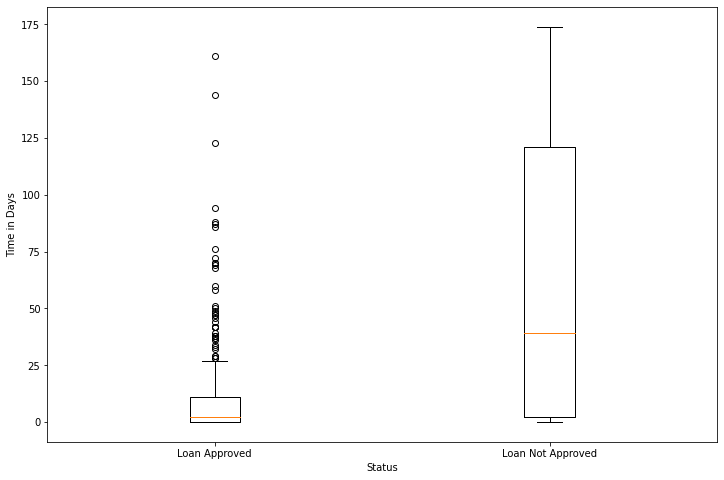

In [46]:
df_filter_Achieved=df[df['LeadExitDesc']=='Application Achieved']
df_filter_not_Achieved=df[df['LeadExitDesc']!='Application Achieved']

df_filter_Achieved['Time Delta']=(df_filter_Achieved['LeadExitTs']-df_filter_Achieved['LeadSubmitTs']).dt.days
df_filter_not_Achieved['Time Delta']=(df_filter_not_Achieved['LeadExitTs']-df_filter_not_Achieved['LeadSubmitTs']).dt.days



df_filter_Achieved=df_filter_Achieved.dropna(subset=['Time Delta'])
df_filter_not_Achieved=df_filter_not_Achieved.dropna(subset=['Time Delta'])

df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time Delta']>-1]
df_filter_not_Achieved=df_filter_not_Achieved[df_filter_not_Achieved['Time Delta']>-1]


x1=df_filter_Achieved['Time Delta'].values
x2=df_filter_not_Achieved['Time Delta'].values
fig = plt.figure(figsize = (12, 8))

box_plot_data=[x1,x2]
plt.boxplot(box_plot_data,labels=['Loan Approved','Loan Not Approved'])
plt.xlabel("Status")
plt.ylabel("Time in Days")
plt.show()


In [29]:
print(df_filter_Achieved['Time Delta'].describe())
print(df_filter_not_Achieved['Time Delta'].describe())

count    367.000000
mean      10.307902
std       20.464564
min        0.000000
25%        0.000000
50%        2.000000
75%       11.000000
max      161.000000
Name: Time Delta, dtype: float64
count    3626.000000
mean       57.648649
std        53.092160
min         0.000000
25%         2.000000
50%        39.000000
75%       121.000000
max       174.000000
Name: Time Delta, dtype: float64


<ipython-input-53-4825a850159e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_Achieved['Time_Delta_1']=(df_filter_Achieved['InitialRightPartyContactTs']-df_filter_Achieved['LeadSubmitTs']).dt.days
<ipython-input-53-4825a850159e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_Achieved['Time_Delta_2']=(df_filter_Achieved['OpportunityCreatedTs']-df_filter_Achieved['InitialRightPartyContactTs']).dt.days
<ipython-input-53-4825a850159e>:6: SettingWithCopyWarning: 
A value is trying to be 

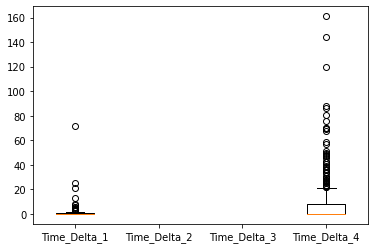

In [53]:
df_filter_Achieved=df[df['LeadExitDesc']=='Application Achieved']
df_filter_not_Achieved=df[df['LeadExitDesc']!='Application Achieved']

df_filter_Achieved['Time_Delta_1']=(df_filter_Achieved['InitialRightPartyContactTs']-df_filter_Achieved['LeadSubmitTs']).dt.days
df_filter_Achieved['Time_Delta_2']=(df_filter_Achieved['OpportunityCreatedTs']-df_filter_Achieved['InitialRightPartyContactTs']).dt.days
df_filter_Achieved['Time_Delta_3']=(df_filter_Achieved['CreditPullDt']-df_filter_Achieved['OpportunityCreatedTs']).dt.days
df_filter_Achieved['Time_Delta_4']=(df_filter_Achieved['App_Initiate_Dt']-df_filter_Achieved['CreditPullDt']).dt.days
df_filter_Achieved['Time_Delta_5']=(df_filter_Achieved['Fund_Dt']-df_filter_Achieved['App_Initiate_Dt']).dt.days

'''
df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time_Delta_1']>-1]
df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time_Delta_2']>-1]
df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time_Delta_3']>-1]
df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time_Delta_4']>-1]
df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time_Delta_5']>-1]
df_filter_Achieved=df_filter_Achieved[df_filter_Achieved['Time_Delta_6']>-1]
'''

x1=df_filter_Achieved['Time_Delta_1'].values
x2=df_filter_Achieved['Time_Delta_2'].values
x3=df_filter_Achieved['Time_Delta_3'].values
x4=df_filter_Achieved['Time_Delta_4'].values

box_plot_data=[x1,x2,x3,x4]
plt.boxplot(box_plot_data,labels=['Time_Delta_1','Time_Delta_2','Time_Delta_3','Time_Delta_4'])
plt.show()


In [50]:
len(df_filter_Achieved['Time_Delta_3'])

367

In [58]:
np.mean(df_filter_Achieved['Time_Delta_4'].dropna())

9.043596730245232

In [59]:
df_filter_Achieved=df[df['LeadExitDesc']=='Application Achieved']
df_filter_not_Achieved=df[df['LeadExitDesc']!='Application Achieved']

df_filter_not_Achieved['Time_Delta_1']=(df_filter_not_Achieved['InitialRightPartyContactTs']-df_filter_not_Achieved['LeadSubmitTs']).dt.days
df_filter_not_Achieved['Time_Delta_2']=(df_filter_not_Achieved['OpportunityCreatedTs']-df_filter_not_Achieved['InitialRightPartyContactTs']).dt.days
df_filter_not_Achieved['Time_Delta_3']=(df_filter_not_Achieved['CreditPullDt']-df_filter_not_Achieved['OpportunityCreatedTs']).dt.days
df_filter_not_Achieved['Time_Delta_4']=(df_filter_not_Achieved['App_Initiate_Dt']-df_filter_not_Achieved['CreditPullDt']).dt.days
df_filter_not_Achieved['Time_Delta_5']=(df_filter_not_Achieved['Fund_Dt']-df_filter_not_Achieved['App_Initiate_Dt']).dt.days


<ipython-input-59-f5ad521995ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_not_Achieved['Time_Delta_1']=(df_filter_not_Achieved['InitialRightPartyContactTs']-df_filter_not_Achieved['LeadSubmitTs']).dt.days
<ipython-input-59-f5ad521995ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_not_Achieved['Time_Delta_2']=(df_filter_not_Achieved['OpportunityCreatedTs']-df_filter_not_Achieved['InitialRightPartyContactTs']).dt.days
<ipython-input-59-f5ad521995ea>:6: SettingWithCopyWarning: 


In [69]:
np.mean(df_filter_not_Achieved['Time_Delta_2'])

0.002973977695167286

In [70]:
df_filter_Achieved

,Lead_ID,LeadSubmitTs,InitialRightPartyContactTs,OpportunityCreatedTs,CreditPullDt,App_Initiate_Dt,Fund_Dt,Loan_Amount,Property_State,LeadExitTs,LeadExitDesc,MarketingPersona,App_Status,month
10,74379343,2022-10-17,2022-10-17,2022-10-17,2022-10-17,2022-10-17,2022-10-19,675000.00,GA,2022-10-17,Application Achieved,Betty,True,10
30,71394786,2022-07-05,2022-07-05,2022-07-05,2022-07-05,2022-07-22,2022-10-18,300000.00,NY,2022-07-22,Application Achieved,Cindy,True,7
45,75494912,2022-08-09,2022-08-09,2022-08-09,2022-08-09,2022-10-18,2022-10-21,290000.00,KS,2022-10-18,Application Achieved,Betty,True,8
46,70218097,2022-09-02,2022-09-04,2022-09-04,2022-09-27,2022-09-27,2022-10-07,316000.00,GA,2022-09-27,Application Achieved,Betty,True,9
62,73528058,2022-09-13,2022-09-14,2022-09-14,2022-09-14,2022-09-14,2022-09-18,470000.00,NY,2022-09-14,Application Achieved,Betty,True,9
64,78328285,2022-07-08,2022-07-08,2022-07-08,2022-07-08,2022-07-14,2022-09-15,203700.00,NY,2022-07-14,Application Achieved,Carl,True,7
66,73780689,2022-10-02,2022-10-02,2022-10-02,2022-10-02,2022-10-02,NaT,403750.00,IL,2022-10-02,Application Achieved,Cindy,True,10
105,72304992,2022-09-07,2022-09-07,2022-09-07,2022-09-07,2022-09-08,2022-09-30,350550.00,MI,2022-09-08,Application Achieved,Wally,True,9
107,71069593,2022-08-15,2022-08-15,2022-08-15,2022-08-15,2022-08-15,NaT,210000.00,NE,2022-08-15,Application Achieved,Carl,True,8
116,75127464,2022-08-26,2022-08-26,2022-08-26,2022-08-26,2022-10-12,2022-10-19,263200.00,MI,2022-10-12,Application Achieved,Cindy,True,8
